# 胡洋完成部分（16020510049）
#  申请分数（95分）

## 第六题（哈夫曼树编/译码器，难度高）&第二题（栈，串，难度低）

### 题目六（哈夫曼树编/译码器）
  给定n个权值作为n个叶子结点，构造一棵二叉树，若带权路径长度达到最小，称这样的二叉树为最优二叉树，也称为哈夫曼树(Huffman Tree)。哈夫曼树是带权路径长度最短的树，权值较大的结点离根较近。


在这里利用哈夫曼编码可以提高通信利用率，减小信息传输成本

算法流程图如下：

![](tsp.png)

1.translate the position to DNA:

In [ ]:
 def translateDNA(self, DNA, city_position):     # get cities' coord in order
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        for i, d in enumerate(DNA):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        return line_x, line_y

2.shorter distance,bigger fitness,a principal to choose the appropriate DNA(also the array of city position)  

In [ ]:
    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = np.exp(self.DNA_size * 2 / total_distance)
        return fitness, total_distance

3.just like the DNA crossover ,often the crossover rate
is not big,we here choose 0.1

In [ ]:
def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            keep_city = parent[~cross_points]                                       # find the city number
            swap_city = pop[i_, np.in1d(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent

4.like DNA mutate,swap the two DNA sequance

In [5]:
def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

# the total code

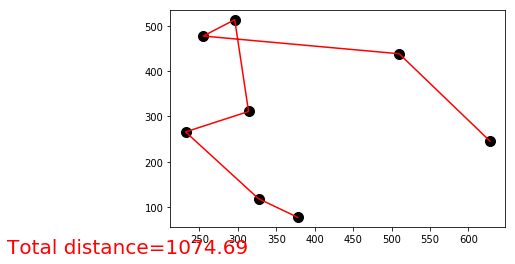

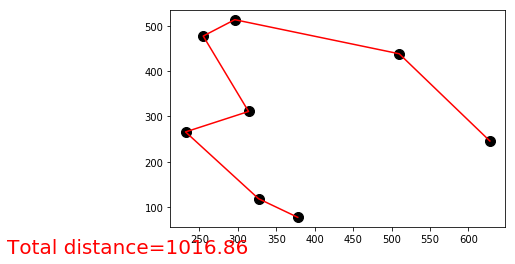

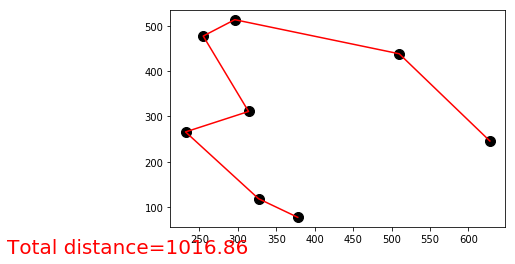

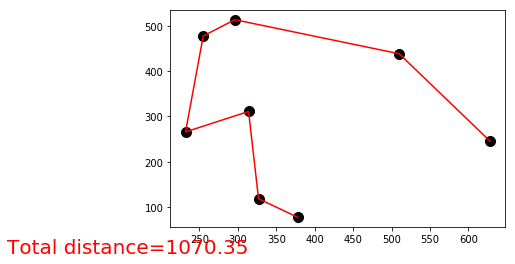

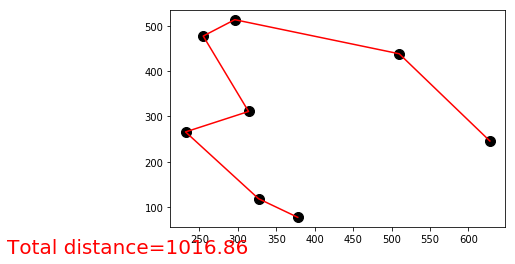

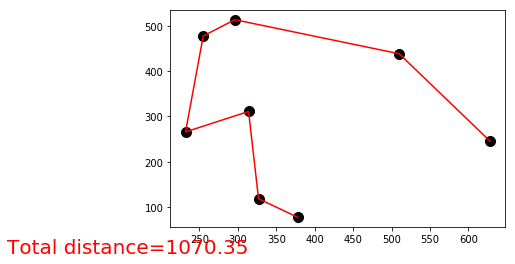

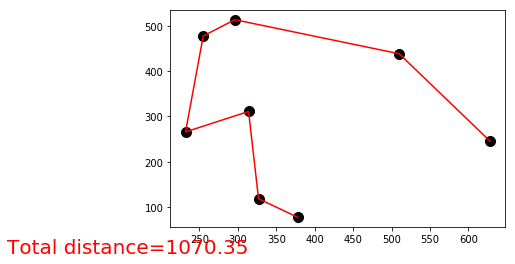

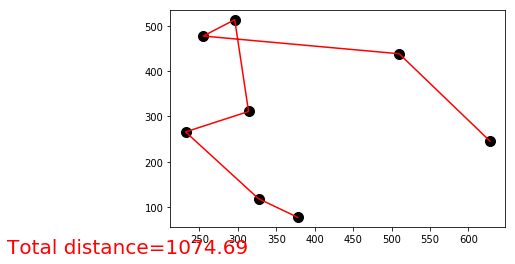

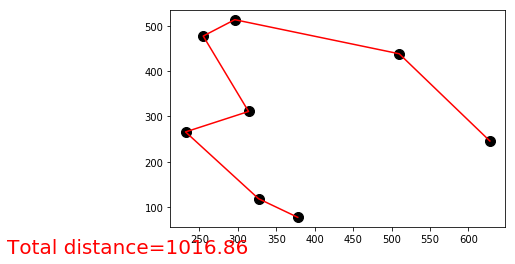

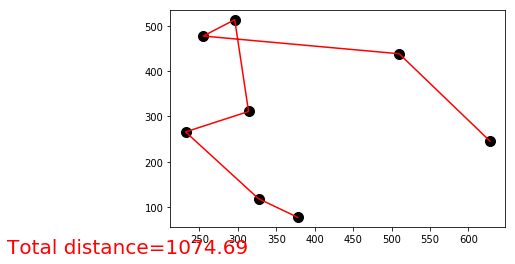

In [6]:

import matplotlib.pyplot as plt
import numpy as np
import operator
import math

N_CITIES = 8  # city size
CROSS_RATE = 0.1
MUTATE_RATE = 0.02
POP_SIZE = 500
N_GENERATIONS = 50


class GA(object):
    def __init__(self, DNA_size, cross_rate, mutation_rate, pop_size, ):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.vstack([np.random.permutation(DNA_size) for _ in range(pop_size)])

    def translateDNA(self, DNA, city_position):     # get cities' coord in order
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        for i, d in enumerate(DNA):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        return line_x, line_y

    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = np.exp(self.DNA_size * 2 / total_distance)
        return fitness, total_distance

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            keep_city = parent[~cross_points]                                       # find the city number
            swap_city = pop[i_, np.in1d(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop
        
        

class TravelSalesPerson(object):
    def __init__(self, n_cities):
        self.city_position = np.array([
         [378,78 ],
         [327,119],
         [232,266],
         [314,311],
         [255,477],
         [296,513],
         [510,438],
         [628,246]])

#         plt.ion()

    def plotting(self, lx, ly, total_d):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=100, c='k')
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, "Total distance=%.2f" % total_d, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.01)

        
k=0
while k<10:
    ga = GA(DNA_size=N_CITIES, cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)

    env = TravelSalesPerson(N_CITIES)
    tototal=[]
    lxx=[]
    lyy=[]
    for generation in range(N_GENERATIONS):
        lx, ly = ga.translateDNA(ga.pop, env.city_position)
        lxx.append(lx)
        lyy.append(ly)
        fitness, total_distance = ga.get_fitness(lx, ly)
        tototal.append(total_distance)
        ga.evolve(fitness)
        best_idx = np.argmax(fitness)
       # print('Gen:', generation, '| best fit: %.8f' % fitness[best_idx])

       # env.plotting(lx[best_idx], ly[best_idx], total_distance[best_idx])





    c=np.argmin(tototal)
    # print(min(tototal[math.floor(c/500)]))
    # print(np.min(tototal))
    
    c1=math.floor(c/500)
    c2=c%500
    operator.eq(tototal[0][0],1)
    if lxx[c1][c2][0]==378.:
        env.plotting(lxx[c1][c2], lyy[c1][c2], min(tototal[math.floor(c/500)]))
        k=k+1


由于启发式算法不能保证最优，经过多次迭代，我们求得最优结果为L=1016.86

心得体会：数据可视化有利于加深理解，启发式算法作为解决问题手段效率一般，可以使用机理分析的方法，对计算进行相应剪枝操作

### 题目1（线性表）

处理流程图：

![](xxb.png)

代码如下：

In [ ]:
#include <iostream>
#include<stdio.h>
#include<malloc.h>
#include<cstdio>
#include <algorithm>
using namespace std;
typedef int ElemType;
typedef struct LNode
{
    ElemType data;
    struct LNode *next;
} LinkList;
void DispList(LinkList*L)
{
    LinkList *p=L->next;
    while(p!=NULL)
    {
        printf("%d ",p->data);
        p=p->next;
    }
    printf("\n");
}
void DestroyList(LinkList *&L)
{
    LinkList*p=L->next,*pre=L;
    while(p!=NULL)
    {
        free(pre);
        pre=p;
        p=pre->next;
    }
    free(pre);
}
///尾插法建表
void CreatListR(LinkList *&L,ElemType a[],int n)
{
    LinkList *s,*r;
    L=(LinkList*)malloc(sizeof(LinkList));
    r=L;
    for(int i=0; i<n; i++)
    {
        s=(LinkList*)malloc(sizeof(LinkList));
        s->data=a[i];
        r->next=s;
        r=s;
    }
    r->next=NULL;
}
///从小到大排序
void ssort(LinkList *&L)
{
    LinkList *pre,*p,*q;
    p=L->next->next;
    L->next->next=NULL;
    while(p!=NULL)
    {
        q=p->next;
        pre=L;
        while(pre->next!=NULL&&pre->next->data<p->data)
            pre=pre->next;
        p->next=pre->next;
        pre->next=p;
        p=q;
    }
}




///求集合的并
void Union(LinkList *ha,LinkList*hb,LinkList*&hc)
{
    LinkList *pa=ha->next,*pb=hb->next,*pc,*s;
    hc=(LinkList*)malloc(sizeof(LinkList));
    pc=hc;
    while(pa!=NULL &&pb!=NULL )
    {
        if(pa->data<pb->data)
        {
            s=(LinkList*)malloc(sizeof(LinkList));
            s->data=pa->data;
            pc->next=s;
            pc=s;
            pa=pa->next;
        }
        else if(pa->data>pb->data)
        {
            s=(LinkList*)malloc(sizeof(LinkList));
            s->data=pb->data;
            pc->next=s;
            pc=s;
            pb=pb->next;
        }
        else
        {
            s=(LinkList*)malloc(sizeof(LinkList));
            s->data=pa->data;
            pc->next=s;
            pc=s;
            pa=pa->next;
            pb=pb->next;
        }
    }
    if(pb!=NULL)
        pa=pb;
    while(pa!=NULL)
    {
        s=(LinkList*)malloc(sizeof(LinkList));
        s->data=pa->data;
        pc->next=s;
        pc=s;
        pa=pa->next;
    }
    pc->next=NULL;
}
///求两个有序集合的交用尾插法
void InterSect(LinkList *ha,LinkList*hb,LinkList*&hc)
{
    LinkList *pa=ha->next,*pb,*pc,*s;
    hc=(LinkList*)malloc(sizeof(LinkList));
    pc=hc;
    while(pa!=NULL)
    {
        pb=hb->next;
        while(pb!=NULL&&pb->data<pa->data)
            pb=pb->next;
        if(pb!=NULL &&pb->data==pa->data)///B节点在A节点中复制A节点
        {
            s=(LinkList*)malloc(sizeof(LinkList));
            s->data=pa->data;
            pc->next=s;
            pc=s;
        }
        pa=pa->next;
    }
    pc->next=NULL;
}
///求两个有序集合的差
void Subs(LinkList *ha,LinkList*hb,LinkList*&hc)
{
    LinkList *pa=ha->next,*pb,*pc,*s;
    hc=(LinkList*)malloc(sizeof(LinkList));
    pc=hc;
    while(pa!=NULL)
    {
        pb=hb->next;
        while(pb!=NULL&&pb->data<pa->data)
            pb=pb->next;
        if(!(pb!=NULL &&pb->data==pa->data))///B节点不在A节点中复制A节点
        {
            s=(LinkList*)malloc(sizeof(LinkList));
            s->data=pa->data;
            pc->next=s;
            pc=s;
        }
         pa=pa->next;
    }
    pc->next=NULL;
}


int main()
{
    LinkList *ha,*hb,*hc,*ha1,*hb1;
    ElemType a[100];
    ElemType b[100];
    int m,n,i;
    cin>>m>>n;
    if(m==0&&n==0){
        printf(" AB为空集\n");
        printf(" 它们的交并差均为空集");

    }


    if(m==0&&n!=0){
        for(i=0;i<n;i++){
        cin>>a[i];
    }
    printf("A为空集\n");
    printf("B集，并集为:");
    for(i=0;i<n;i++)
    {
        if(a[i]!=a[i+1])
            printf("%d ",a[i]);
    }
    printf("\n");
    printf("交集，差集为空\n");

    }

    if(m!=0&&n==0){
        for(i=0;i<m;i++){
        cin>>b[i];
    }
    printf("B为空集\n");
    printf("A集，并集为:");
    for(i=0;i<m;i++)
    {
        if(b[i]!=b[i+1])
            printf("%d ",b[i]);
    }
    printf("\n");
    printf("交集为空\n");
    printf("差集为：");
    for(i=0;i<m;i++)
    {
        if(b[i]!=b[i+1])
            printf("%d ",b[i]);
    }


    }


    if(m!=0&&n!=0){
    for(i=0;i<m;i++){
        cin>>a[i];
    }
    for(i=0;i<n;i++){
        cin>>b[i];
    }
    int a1[1000],b1[1000];
    int j;


    sort(a,a+m);
    sort(b,b+n);
    int i1=0,i2=0;
    for(i=0;i<m;i++){
        while(a[i]==a[i+1]){
            i++;
        }
        a1[i1++]=a[i];
    }
    for(i=0;i<n;i++){
        if(b[i]==b[i+1]){
            i++;
        }
        b1[i2++]=b[i];
    }



    printf(" 集合的运算如下:\n");
    CreatListR(ha,a1,i1);
    CreatListR(hb,b1,i2);




    ssort(ha);
    ssort(hb);

    printf(" 集合A: ");
    DispList(ha);
    printf(" 集合B: ");
    DispList(hb);

    Union(ha,hb,hc);
    printf(" 并: ");
    DispList(hc);

    InterSect(ha,hb,hc);
    printf(" 交: ");
    DispList(hc);

    Subs(ha,hb,hc);
    printf(" 差: ");
    DispList(hc);

    }


    return 0;
}


In [ ]:
问题一：输入给定数据

![](1.png)

In [ ]:
问题二：其中一个是空集

![](2.png)

In [ ]:
问题三：两个都是空集

![](3.png)

In [ ]:
问题四：有重复元素

![](4.png)

心得体会：在进行查重时先进行了排序，在建立集合时先将其放到暂时容器中，个人认为效率低下，可以改进

分工：以上两道题个人独立完成，并协助队友共同完成，互相学习